ロジスティック回帰

In [ ]:
from sklearn.datasets import load_wine

データセット

In [ ]:
dataset = load_wine()
dataset

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [ ]:
dataset.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [ ]:
dataset.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [ ]:
# 日本語にする

feature_names_ja = [
    "アルコール",
    "リンゴ酸",
    "灰分",
    "灰分のアルカリ度",
    "マグネシウム",
    "総フェノール",
    "フラボノイド",
    "非フラボノイドフェノール",
    "プロアントシアニン",
    "色の濃さ",
    "色相",
    "OD280/OD315(希釈ワイン)",
    "プロリン"
]

In [ ]:
import pandas as pd
df = pd.DataFrame(data=dataset.data, columns=feature_names_ja)
df.head()

,アルコール,リンゴ酸,灰分,灰分のアルカリ度,マグネシウム,総フェノール,フラボノイド,非フラボノイドフェノール,プロアントシアニン,色の濃さ,色相,OD280/OD315(希釈ワイン),プロリン
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
df["種類"] = dataset.target
df.head()

,アルコール,リンゴ酸,灰分,灰分のアルカリ度,マグネシウム,総フェノール,フラボノイド,非フラボノイドフェノール,プロアントシアニン,色の濃さ,色相,OD280/OD315(希釈ワイン),プロリン,種類
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
# データサイズの確認
df.shape

(178, 14)

In [ ]:
# データの欠損の確認
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   アルコール               178 non-null    float64
 1   リンゴ酸                178 non-null    float64
 2   灰分                  178 non-null    float64
 3   灰分のアルカリ度            178 non-null    float64
 4   マグネシウム              178 non-null    float64
 5   総フェノール              178 non-null    float64
 6   フラボノイド              178 non-null    float64
 7   非フラボノイドフェノール        178 non-null    float64
 8   プロアントシアニン           178 non-null    float64
 9   色の濃さ                178 non-null    float64
 10  色相                  178 non-null    float64
 11  OD280/OD315(希釈ワイン)  178 non-null    float64
 12  プロリン                178 non-null    float64
 13  種類                  178 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 19.6 KB


In [ ]:
# 統計情報の確認
df.describe()

,アルコール,リンゴ酸,灰分,灰分のアルカリ度,マグネシウム,総フェノール,フラボノイド,非フラボノイドフェノール,プロアントシアニン,色の濃さ,色相,OD280/OD315(希釈ワイン),プロリン,種類
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [ ]:
pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 41.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=d8810cbce72167f647d0facf3f66b8165f28f2cbfab3c5886f79eaa10831ce6c
  Stored in directory: /root/.cache/pip/wheels/c1/f7/9b/418f19a7b9340fc16e071e89efc379aca68d40238b258df53d
Successfully built japanize-matplotlib


In [ ]:
import japanize_matplotlib

array([[<Axes: title={'center': 'アルコール'}>,
        <Axes: title={'center': 'リンゴ酸'}>, <Axes: title={'center': '灰分'}>,
        <Axes: title={'center': '灰分のアルカリ度'}>],
       [<Axes: title={'center': 'マグネシウム'}>,
        <Axes: title={'center': '総フェノール'}>,
        <Axes: title={'center': 'フラボノイド'}>,
        <Axes: title={'center': '非フラボノイドフェノール'}>],
       [<Axes: title={'center': 'プロアントシアニン'}>,
        <Axes: title={'center': '色の濃さ'}>, <Axes: title={'center': '色相'}>,
        <Axes: title={'center': 'OD280/OD315(希釈ワイン)'}>],
       [<Axes: title={'center': 'プロリン'}>, <Axes: title={'center': '種類'}>,
        <Axes: >, <Axes: >]], dtype=object)

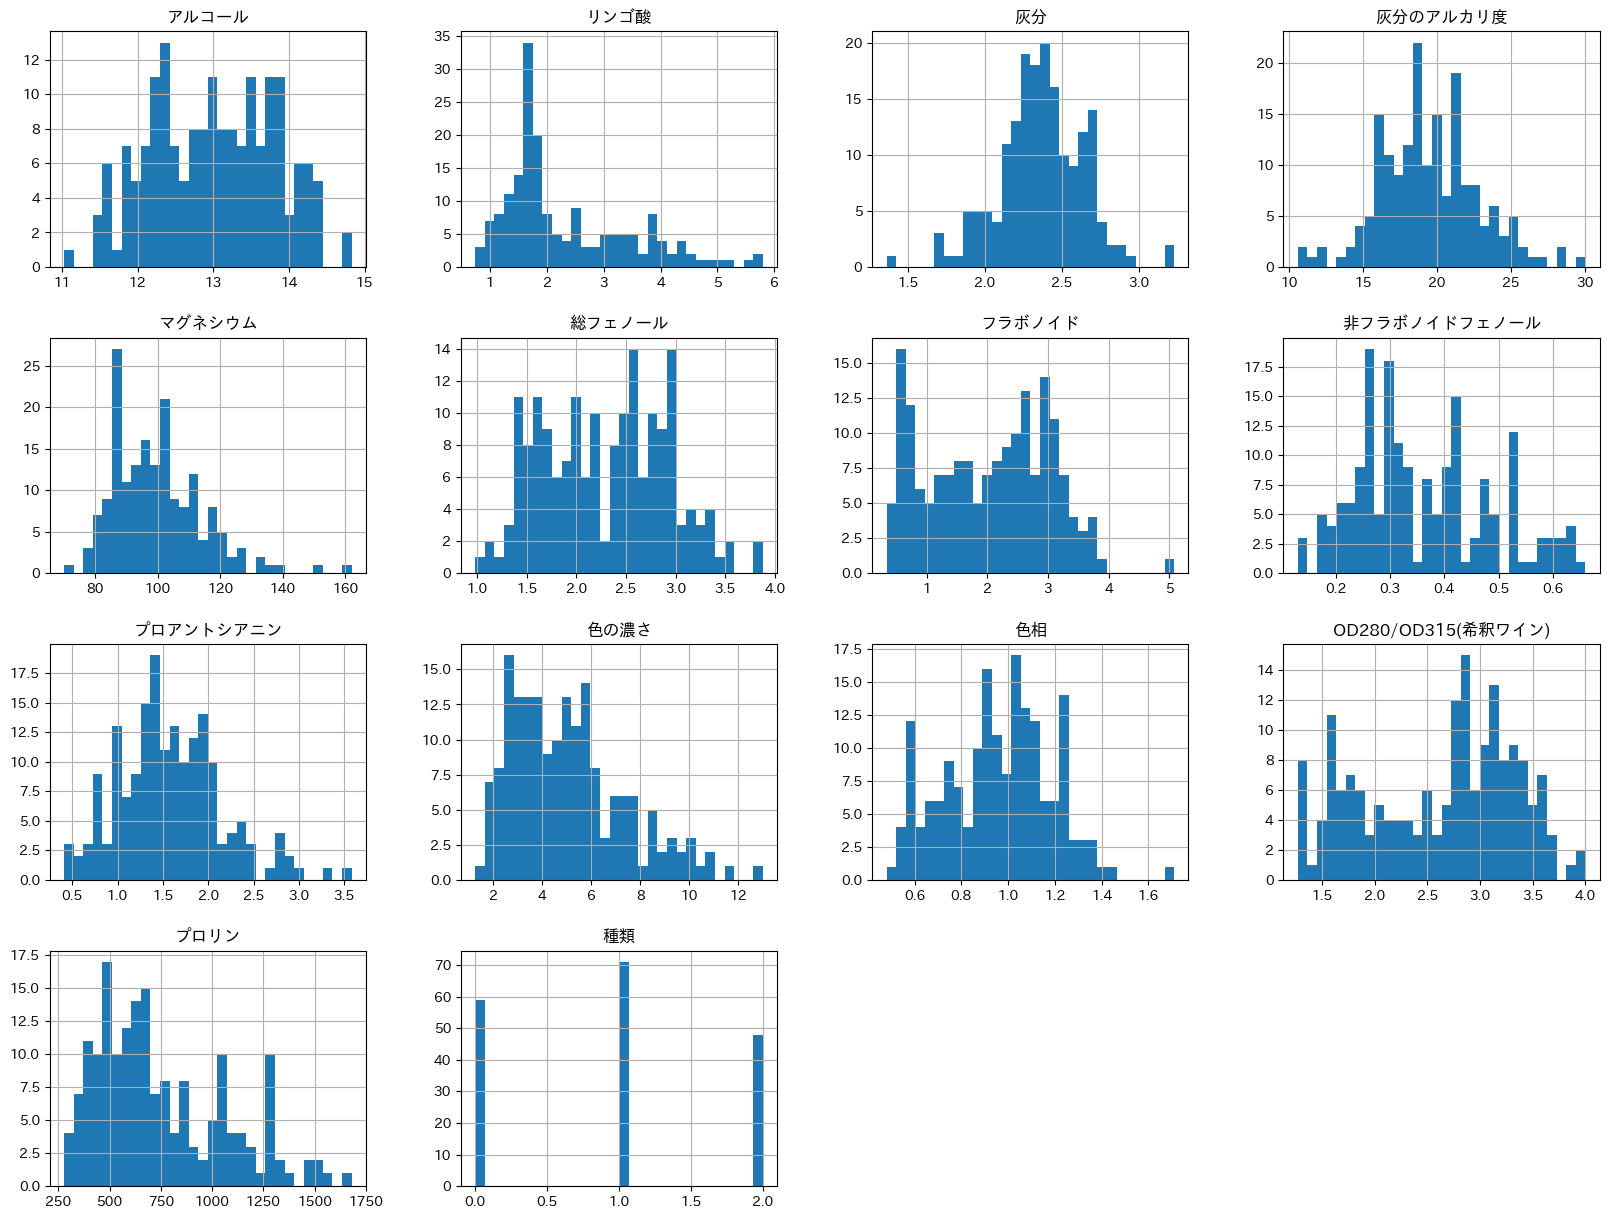

In [ ]:
# 外れ値の確認
df.hist(figsize=(20, 15), bins=30)

In [ ]:
from numpy.random import logistic
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

#学習データとテストデータへの分割
X = df.drop(columns=["種類"]).to_numpy()
y = df["種類"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 正規化
scaler_norm = MinMaxScaler()
X_train_norm = scaler_norm.fit_transform(X_train)
X_test_norm = scaler_norm.transform(X_test)

model_norm = LogisticRegression(max_iter=100)
model_norm.fit(X_train_norm, y_train)
y_pred_norm = model_norm.predict(X_test_norm)




In [ ]:
# 精度の確認

print("Accuracy:", accuracy_score(y_test, y_pred_norm))
print("分類レポート:\n", classification_report(
    y_test, y_pred_norm, target_names=[str(c) for c in df["種類"].unique()]
))

Accuracy: 1.0
分類レポート:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        13

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



ワインの分類に重要度の確認

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# モデル学習
model = RandomForestClassifier(random_state=0)
model.fit(X_train_norm, y_train)

# 特徴量重要度を取得
importances = model.feature_importances_

importance_df = pd.DataFrame({
    "特徴量": feature_names_ja,
    "重要度": importances
}).sort_values("重要度", ascending=False)

print(importance_df)

                   特徴量       重要度
9                 色の濃さ  0.194819
12                プロリン  0.164348
6               フラボノイド  0.145228
11  OD280/OD315(希釈ワイン)  0.119075
0                アルコール  0.088747
10                  色相  0.080266
5               総フェノール  0.061579
3             灰分のアルカリ度  0.039190
1                 リンゴ酸  0.029782
8            プロアントシアニン  0.023107
4               マグネシウム  0.022962
2                   灰分  0.016638
7         非フラボノイドフェノール  0.014258


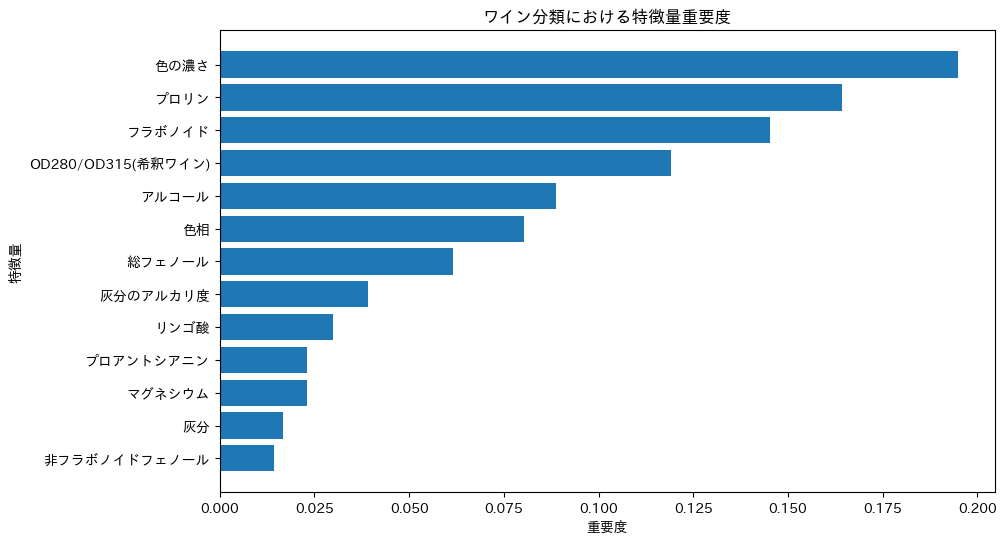

In [ ]:
import matplotlib.pyplot as plt
# 重要度のグラフ表示
importance_df = pd.DataFrame({
    "特徴量": feature_names_ja,
    "重要度": importances
}).sort_values("重要度", ascending=True)

plt.figure(figsize=(10,6))
plt.barh(importance_df["特徴量"], importance_df["重要度"])
plt.xlabel("重要度")
plt.ylabel("特徴量")
plt.title("ワイン分類における特徴量重要度")
plt.show()
